<a href="https://colab.research.google.com/github/11doris/jazz-maestro/blob/colab_word_embeddings/chord_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gensim
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pprint

In [2]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

### Download Data

Download the file with the input sequences from Google Drive:

In [3]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1H8uRflGJGQecZlmy4jTK8aqKlyc-8C6y' -O input_seq.txt

--2021-10-26 09:23:29--  https://docs.google.com/uc?export=download&id=1H8uRflGJGQecZlmy4jTK8aqKlyc-8C6y
Resolving docs.google.com (docs.google.com)... 142.251.45.14, 2607:f8b0:4004:83e::200e
Connecting to docs.google.com (docs.google.com)|142.251.45.14|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/moeq2kks3adl2oa9sakriurrk2ate2ad/1635240150000/14329102864480165501/*/1H8uRflGJGQecZlmy4jTK8aqKlyc-8C6y?e=download [following]
--2021-10-26 09:23:29--  https://doc-14-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/moeq2kks3adl2oa9sakriurrk2ate2ad/1635240150000/14329102864480165501/*/1H8uRflGJGQecZlmy4jTK8aqKlyc-8C6y?e=download
Resolving doc-14-4c-docs.googleusercontent.com (doc-14-4c-docs.googleusercontent.com)... 142.250.188.193, 2607:f8b0:4004:836::2001
Connecting to doc-14-4c-docs.googleusercontent.com (doc-14-4c-docs.google

Download the file with the meta data from Google Drive:


In [4]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Gy68KSn98UhfQm9YeRHjP6JsBzlN5z-S' -O input_meta.txt

--2021-10-26 09:23:29--  https://docs.google.com/uc?export=download&id=1Gy68KSn98UhfQm9YeRHjP6JsBzlN5z-S
Resolving docs.google.com (docs.google.com)... 142.251.45.14, 2607:f8b0:4004:83e::200e
Connecting to docs.google.com (docs.google.com)|142.251.45.14|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3iac6ova7ghevosjq5rqlff8dvi2c0it/1635240150000/14329102864480165501/*/1Gy68KSn98UhfQm9YeRHjP6JsBzlN5z-S?e=download [following]
--2021-10-26 09:23:30--  https://doc-0k-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3iac6ova7ghevosjq5rqlff8dvi2c0it/1635240150000/14329102864480165501/*/1Gy68KSn98UhfQm9YeRHjP6JsBzlN5z-S?e=download
Resolving doc-0k-4c-docs.googleusercontent.com (doc-0k-4c-docs.googleusercontent.com)... 142.250.188.193, 2607:f8b0:4004:836::2001
Connecting to doc-0k-4c-docs.googleusercontent.com (doc-0k-4c-docs.google

In [5]:
path_to_file = '/content/input_seq.txt'

with open(path_to_file) as f: 
  lines = f.read().splitlines()

In [6]:
data = [line.split(' ') for line in lines]

In [7]:
print(data)

[['CM7', 'Eb7', 'G#M7', 'B7', 'EM7', 'G7', 'Gm7', 'C7', 'FM7', 'G#7', 'C#M7', 'E7', 'Am7', 'D7', 'Dm7', 'G7', 'CM7', 'Eb7', 'G#M7', 'B7', 'EM7', 'G7', 'Gm7', 'C7', 'FM7', 'Eb7', 'G#M7', 'B7', 'EM7', 'G7', 'CM7', 'Gm7', 'C7', 'Bm7', 'E7', 'AM7', 'C7', 'FM7', 'Bbm7', 'Eb7', 'G#M7', 'Dm7', 'G7', 'CM7', 'Eb7', 'G#M7', 'B7', 'EM7', 'G7', 'Gm7', 'C7', 'FM7', 'Eb7', 'G#M7', 'B7', 'EM7', 'G7', 'CM7'], ['Am7', 'Am7', 'Cm7', 'Cm7', 'EbM7', 'EbM7', 'Em7b5', 'A7(+#9)', 'Dm7', 'Dm7', 'Bm7b5', 'Bm7b5', 'Bbm7', 'Bbm7', 'Fm7', 'Fm7', 'E7(+#9)', 'E7(+#9)', 'Fm7', 'Fm7', 'C#M7', 'C#M7', 'Fm7', 'Fm7', 'C#M7', 'C#M7'], ['Am7', 'C#M7', 'Bm7b5', 'E7(+#9)', 'Am7', 'C#M7', 'Bm7b5', 'E7(+#9)', 'Cm7', 'F7(+b9)', 'BbM7', 'G#m7', 'C#7', 'F#m7b5', 'B7(+b9)', 'EaugM7', 'EaugM7', 'E7', 'Am7', 'C#M7', 'Bm7b5', 'E7(+#9)', 'Am7', 'C#M7', 'Bm7b5', 'E7(+#9)', 'Cm7', 'F7(+b9)', 'BbM7', 'G#m7', 'C#7', 'F#m7b5', 'B7(+b9)', 'Em7', 'Em7'], ['C', 'Am7', 'Dm7', 'G7', 'C', 'Am7', 'Dm7', 'G7', 'C', 'Am7', 'Dm7', 'G7', 'C', 'G7', 

## Train Model

In [8]:
# train model
model = gensim.models.Word2Vec(data, min_count=1)

2021-10-26 09:23:30,991 : INFO : collecting all words and their counts
2021-10-26 09:23:30,994 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-10-26 09:23:31,024 : INFO : collected 478 word types from a corpus of 93978 raw words and 2053 sentences
2021-10-26 09:23:31,026 : INFO : Loading a fresh vocabulary
2021-10-26 09:23:31,031 : INFO : effective_min_count=1 retains 478 unique words (100% of original 478, drops 0)
2021-10-26 09:23:31,033 : INFO : effective_min_count=1 leaves 93978 word corpus (100% of original 93978, drops 0)
2021-10-26 09:23:31,040 : INFO : deleting the raw counts dictionary of 478 items
2021-10-26 09:23:31,042 : INFO : sample=0.001 downsamples 51 most-common words
2021-10-26 09:23:31,045 : INFO : downsampling leaves estimated 34108 word corpus (36.3% of prior 93978)
2021-10-26 09:23:31,049 : INFO : estimated required memory for 478 words and 100 dimensions: 621400 bytes
2021-10-26 09:23:31,052 : INFO : resetting layer weights
2021-10

In [9]:
# summarize the loaded model
print(model)

Word2Vec(vocab=478, size=100, alpha=0.025)


In [10]:
# summarize vocabulary
words = model.wv.index2word
print(words)

['G7', 'C', 'Dm7', 'CM7', 'D7', 'A7', 'Am7', 'C7', 'C6', 'F', 'Em7', 'E7', 'Am', 'FM7', 'F7', 'Bb7', 'Gm7', 'B7', 'Bm7b5', 'E7(+b9)', 'G#7', 'Dm', 'A7(+b9)', 'Fm7', 'G', 'Fm', 'F#m7b5', 'Ebdim7', 'Em7b5', 'Eb7', 'Bm7', 'F#m7', 'G7sus4', 'Cm7', 'Em', 'G7(+b9)', 'F6', 'G#M7', 'Fm6', 'Am6', 'Dm7b5', 'Ebm7', 'Gaug', 'C#7', 'BbM7', 'B7(+b9)', 'EbM7', 'F#dim7', 'Gaug7', 'C#dim7', 'Ebdim', 'F#7', 'EM7', 'D9', 'Bbm7', 'C#m7', 'C#M7', 'F#dim', 'Cdim', 'Bb', 'Cm', 'D', 'GM7', 'G9', 'AM7', 'E', 'C#dim', 'E7(+b13)', 'Am9', 'E7(+#9)', 'G#m7', 'Bb7(+#11)', 'Am11', 'DM7', 'C6(+9)', 'G13', 'Bb9', 'G#', 'Dm9', 'Eb', 'Cdim7', 'Gm', 'Eaug7', 'Dm6', 'F9', 'BM7', 'F7(+#11)', 'C7sus4', 'A7(+b13)', 'A7(+#9)', 'C7(+b9)', 'Am7b5', 'D13', 'C9', 'Dm11', 'Caug', 'G9sus4', 'C13', 'D7(+b9)', 'CM7(+#11)', 'Aaug7', 'A', 'D7(+#11)', 'AmM7', 'FM7(+#11)', 'G7(+#9)', 'F#M7', 'C#7(+#11)', 'Caug7', 'C7(+#9)', 'A9', 'Gdim', 'BbM7(+#11)', 'B', 'C#', 'CM9', 'B7(+#9)', 'Bb13', 'G6', 'A7sus4', 'G#dim7', 'D7sus4', 'C#M7(+#11)', 

In [11]:
print(model.wv['G7'])

[-0.24118645 -0.09873192  0.81421447 -0.09113238  0.28143778 -0.43443245
  0.79825777 -0.50134706  0.15575929  0.13965786  0.4413807   0.02131004
  0.05757209 -0.09390312 -0.6315502   0.27253368  0.06860822 -0.41355523
 -0.81292367 -0.398152    0.92123646  0.00588076  0.28759268 -0.21451195
  0.2959754   0.2195785  -0.02671944 -0.32254925 -0.5648537  -0.27373257
  0.30234444 -0.01200318 -0.47340173  0.5530252  -0.08078409 -0.91990346
  0.03244754  0.9041418   0.26351333 -0.3316739   0.03848132  0.1311072
 -0.7154587   0.6201214  -0.5091069   0.43097296 -0.32752174 -0.34436193
  0.08357337  0.5234253   0.13704595  0.6521523   0.14376356 -0.2615153
 -0.8047777   0.4555981  -0.5325718   0.3320404   0.3274877  -0.06775078
  0.16517264  0.57918173  0.33382833 -0.40167764 -0.1126404  -0.05237794
  0.00902154 -0.04358905  0.20381278  0.30509663  0.21480611 -0.44054416
 -0.43945515  0.20801067  0.09810362  0.44302928 -0.1598972  -0.15905412
 -0.22622523 -0.02616716 -0.05246876 -0.5016553  -0.5

In [12]:
# Finding most similar words
words = model.wv.most_similar("CM7", topn=3)
for word in words:
  print(word)
print()

2021-10-26 09:23:31,652 : INFO : precomputing L2-norms of word weight vectors


('Dm7', 0.9291236996650696)
('Em7', 0.8944532871246338)
('A7(+#9)', 0.8662671446800232)



In [13]:
print(model.wv.similarity('C6', 'CM7'))


0.73394597


Get the word2vec weights:

In [14]:
# input
model.wv.vectors.shape

(478, 100)

In [15]:
model.wv.vectors

array([[-2.4118645e-01, -9.8731920e-02,  8.1421447e-01, ...,
         3.3691847e-01,  5.3244942e-01,  6.5368879e-01],
       [-4.1951209e-01,  6.6343941e-02,  6.2014669e-01, ...,
         1.1283300e+00,  8.2304257e-01,  9.9428570e-01],
       [ 2.6112932e-01,  7.1093388e-02,  7.7480596e-01, ...,
        -1.5171756e-01,  2.4978474e-01,  4.4244671e-01],
       ...,
       [-1.4753924e-02,  2.1075392e-03, -9.4148307e-04, ...,
        -3.6995596e-05, -1.2866159e-03, -3.3189619e-03],
       [ 1.5468221e-02,  1.3070292e-02, -1.4647949e-02, ...,
         9.9219587e-03, -6.8497560e-03,  2.3297771e-04],
       [ 1.9644147e-02,  2.0486929e-02, -1.5752845e-02, ...,
         2.0897703e-02, -8.4880162e-03, -8.5194483e-03]], dtype=float32)

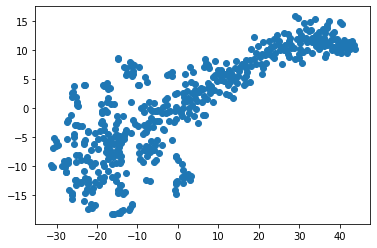

In [16]:
X = model.wv[model.wv.vocab]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()

In [17]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model.wv[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=20, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(20, 20)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

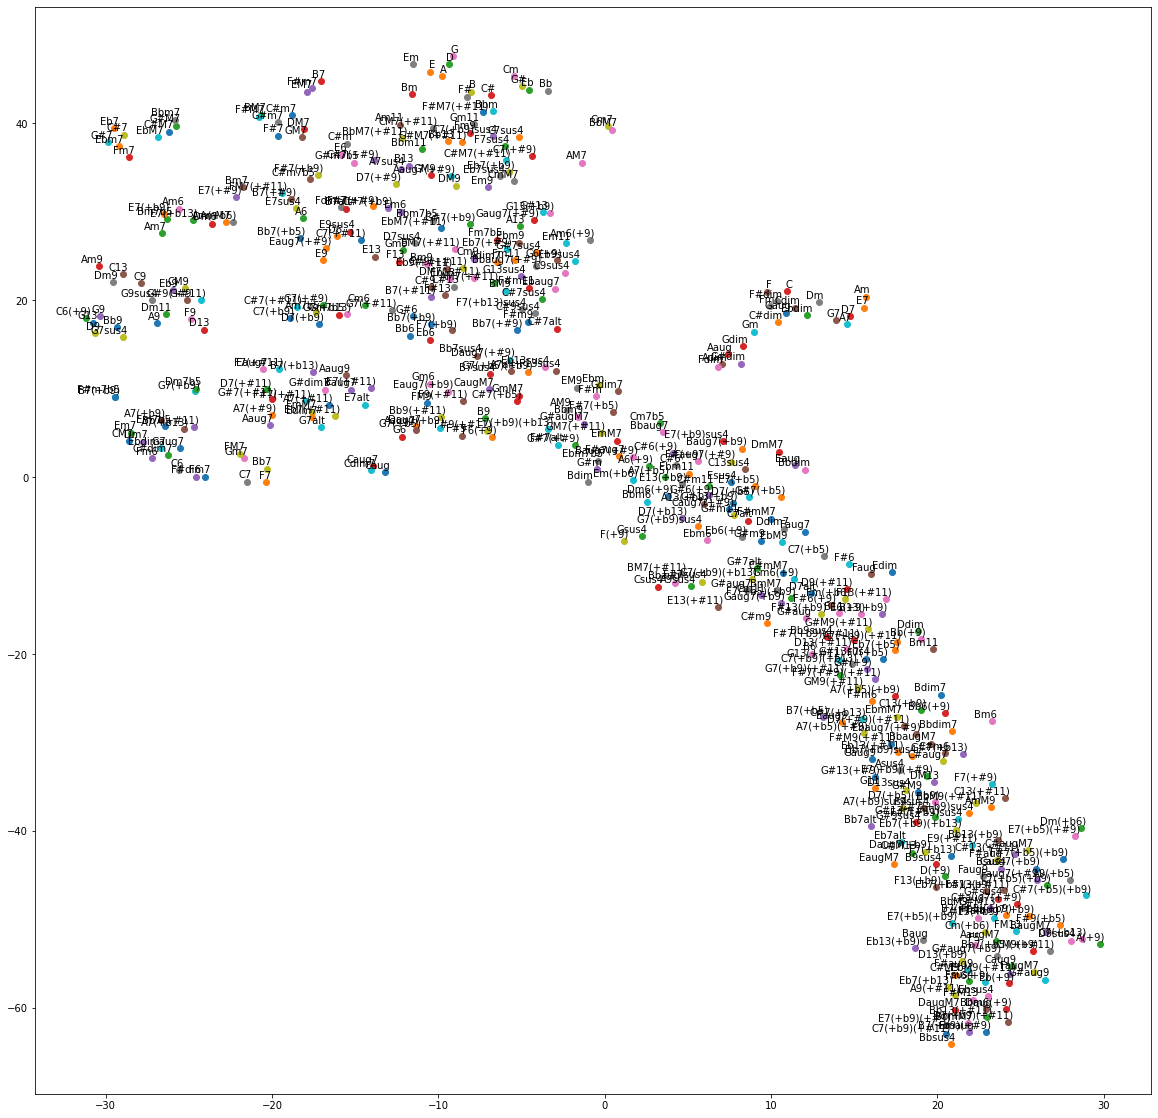

In [18]:
tsne_plot(model)

## Doc2Vec Example Code from gensim

### Core Concepts 

In [19]:
text_corpus = [
    "Human machine interface for lab abc computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of user perceived response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees",
    "Graph minors IV Widths of trees and well quasi ordering",
    "Graph minors A survey",
]

In [20]:
path_to_file = '/content/input_seq.txt'

#with open(path_to_file) as f: 
#  text_corpus = f.read().splitlines()

In [21]:
import pprint

# Create a set of frequent words
stoplist = set('for a of the and to in'.split(' '))
# Lowercase each document, split it by white space and filter out stopwords
texts = [[word for word in document.lower().split() if word not in stoplist]
#texts = [[word for word in document.split()]
         for document in text_corpus]

# Count word frequencies
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

# Only keep words that appear more than once
processed_corpus = [[token for token in text if frequency[token] > 1] for text in texts]
pprint.pprint(processed_corpus[0:5])

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time']]


Before proceeding, we want to associate each word in the corpus with a unique integer ID. We can do this using the `gensim.corpora.Dictionary` class. This dictionary defines the vocabulary of all words that our processing knows about.

In [22]:
from gensim import corpora

dictionary = corpora.Dictionary(processed_corpus)
print(dictionary)

2021-10-26 09:23:46,674 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-10-26 09:23:46,677 : INFO : built Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...) from 9 documents (total 29 corpus positions)


Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...)


In [23]:
pprint.pprint(dictionary.token2id)

{'computer': 0,
 'eps': 8,
 'graph': 10,
 'human': 1,
 'interface': 2,
 'minors': 11,
 'response': 3,
 'survey': 4,
 'system': 5,
 'time': 6,
 'trees': 9,
 'user': 7}


In [24]:
new_doc = "Human computer interaction"
new_vec = dictionary.doc2bow(new_doc.lower().split())
print(new_vec)

[(0, 1), (1, 1)]


In [25]:
bow_corpus = [dictionary.doc2bow(text) for text in processed_corpus]
pprint.pprint(bow_corpus[0:3])

[[(0, 1), (1, 1), (2, 1)],
 [(0, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
 [(2, 1), (5, 1), (7, 1), (8, 1)]]


In [26]:
from gensim import models

# train the model
tfidf = models.TfidfModel(bow_corpus)

# transform the "system minors" string
words = "system minors".lower().split()
print(tfidf[dictionary.doc2bow(words)])

2021-10-26 09:23:46,866 : INFO : collecting document frequencies
2021-10-26 09:23:46,867 : INFO : PROGRESS: processing document #0
2021-10-26 09:23:46,869 : INFO : calculating IDF weights for 9 documents and 11 features (28 matrix non-zeros)


[(5, 0.5898341626740045), (11, 0.8075244024440723)]


In [27]:
from gensim import similarities

index = similarities.SparseMatrixSimilarity(tfidf[bow_corpus], num_features=12)

2021-10-26 09:23:46,884 : INFO : creating sparse index
2021-10-26 09:23:46,888 : INFO : creating sparse matrix from corpus
2021-10-26 09:23:46,890 : INFO : PROGRESS: at document #0
2021-10-26 09:23:46,895 : INFO : created <9x12 sparse matrix of type '<class 'numpy.float32'>'
	with 28 stored elements in Compressed Sparse Row format>


In [28]:
query_document = 'system engineering'.split()
query_bow = dictionary.doc2bow(query_document)
query_bow

[(5, 1)]

In [29]:
sims = index[tfidf[query_bow]]
sims
#print(list(enumerate(sims)))

array([0.        , 0.32448703, 0.41707572, 0.7184812 , 0.        ,
       0.        , 0.        , 0.        , 0.        ], dtype=float32)

Document 3 has a similarity score of 0.718=72%, document 2 has a similarity score of 42% etc.

In [30]:
for document_number, score in sorted(enumerate(sims), key=lambda x: x[1], reverse=True):
    print(document_number, score)

3 0.7184812
2 0.41707572
1 0.32448703
0 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0


### Corpora and Vector Spaces

In [31]:
documents = [
    "Human machine interface for lab abc computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of user perceived response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees",
    "Graph minors IV Widths of trees and well quasi ordering",
    "Graph minors A survey",
]

In [32]:
from pprint import pprint  # pretty-printer
from collections import defaultdict

# remove common words and tokenize
stoplist = set('for a of the and to in'.split())
texts = [
    [word for word in document.lower().split() if word not in stoplist]
    for document in documents
]

# remove words that appear only once
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [
    [token for token in text if frequency[token] > 1]
    for text in texts
]

pprint(texts)

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]


In [33]:
from gensim import corpora
dictionary = corpora.Dictionary(texts)
print(dictionary)

2021-10-26 09:23:47,000 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-10-26 09:23:47,005 : INFO : built Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...) from 9 documents (total 29 corpus positions)


Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...)


In [34]:
print(dictionary.token2id)

{'computer': 0, 'human': 1, 'interface': 2, 'response': 3, 'survey': 4, 'system': 5, 'time': 6, 'user': 7, 'eps': 8, 'trees': 9, 'graph': 10, 'minors': 11}


In [35]:
new_doc = "Human computer interaction"
new_vec = dictionary.doc2bow(new_doc.lower().split())
print(new_vec)  # the word "interaction" does not appear in the dictionary and is ignored

[(0, 1), (1, 1)]


In [36]:
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize('/tmp/deerwester.mm', corpus)  # store to disk, for later use
print(corpus)

2021-10-26 09:23:47,045 : INFO : storing corpus in Matrix Market format to /tmp/deerwester.mm
2021-10-26 09:23:47,052 : INFO : saving sparse matrix to /tmp/deerwester.mm
2021-10-26 09:23:47,054 : INFO : PROGRESS: saving document #0
2021-10-26 09:23:47,055 : INFO : saved 9x12 matrix, density=25.926% (28/108)
2021-10-26 09:23:47,058 : INFO : saving MmCorpus index to /tmp/deerwester.mm.index


[[(0, 1), (1, 1), (2, 1)], [(0, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)], [(2, 1), (5, 1), (7, 1), (8, 1)], [(1, 1), (5, 2), (8, 1)], [(3, 1), (6, 1), (7, 1)], [(9, 1)], [(9, 1), (10, 1)], [(9, 1), (10, 1), (11, 1)], [(4, 1), (10, 1), (11, 1)]]


### Topics and Transformations

In [37]:
from collections import defaultdict
from gensim import corpora

documents = [
    "Human machine interface for lab abc computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of user perceived response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees",
    "Graph minors IV Widths of trees and well quasi ordering",
    "Graph minors A survey",
]

# remove common words and tokenize
stoplist = set('for a of the and to in'.split())
texts = [
    [word for word in document.lower().split() if word not in stoplist]
    for document in documents
]

# remove words that appear only once
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [
    [token for token in text if frequency[token] > 1]
    for text in texts
]

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

2021-10-26 09:23:47,092 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-10-26 09:23:47,094 : INFO : built Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...) from 9 documents (total 29 corpus positions)


In [38]:
from gensim import models

tfidf = models.TfidfModel(corpus)  # step 1 -- initialize a model

2021-10-26 09:23:47,105 : INFO : collecting document frequencies
2021-10-26 09:23:47,108 : INFO : PROGRESS: processing document #0
2021-10-26 09:23:47,110 : INFO : calculating IDF weights for 9 documents and 11 features (28 matrix non-zeros)


In [39]:
doc_bow = [(0, 1), (1, 1)]
print(tfidf[doc_bow])  # step 2 -- use the model to transform vectors

[(0, 0.7071067811865476), (1, 0.7071067811865476)]


In [40]:
corpus_tfidf = tfidf[corpus]
for doc in corpus_tfidf:
    print(doc)

[(0, 0.5773502691896257), (1, 0.5773502691896257), (2, 0.5773502691896257)]
[(0, 0.44424552527467476), (3, 0.44424552527467476), (4, 0.44424552527467476), (5, 0.3244870206138555), (6, 0.44424552527467476), (7, 0.3244870206138555)]
[(2, 0.5710059809418182), (5, 0.4170757362022777), (7, 0.4170757362022777), (8, 0.5710059809418182)]
[(1, 0.49182558987264147), (5, 0.7184811607083769), (8, 0.49182558987264147)]
[(3, 0.6282580468670046), (6, 0.6282580468670046), (7, 0.45889394536615247)]
[(9, 1.0)]
[(9, 0.7071067811865475), (10, 0.7071067811865475)]
[(9, 0.5080429008916749), (10, 0.5080429008916749), (11, 0.695546419520037)]
[(4, 0.6282580468670046), (10, 0.45889394536615247), (11, 0.6282580468670046)]


In [41]:
lsi_model = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=2)  # initialize an LSI transformation
corpus_lsi = lsi_model[corpus_tfidf]  # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

2021-10-26 09:23:47,146 : INFO : using serial LSI version on this node
2021-10-26 09:23:47,148 : INFO : updating model with new documents
2021-10-26 09:23:47,152 : INFO : preparing a new chunk of documents
2021-10-26 09:23:47,158 : INFO : using 100 extra samples and 2 power iterations
2021-10-26 09:23:47,160 : INFO : 1st phase: constructing (12, 102) action matrix
2021-10-26 09:23:47,162 : INFO : orthonormalizing (12, 102) action matrix
2021-10-26 09:23:47,165 : INFO : 2nd phase: running dense svd on (12, 9) matrix
2021-10-26 09:23:47,167 : INFO : computing the final decomposition
2021-10-26 09:23:47,169 : INFO : keeping 2 factors (discarding 47.565% of energy spectrum)
2021-10-26 09:23:47,170 : INFO : processed documents up to #9
2021-10-26 09:23:47,172 : INFO : topic #0(1.594): 0.703*"trees" + 0.538*"graph" + 0.402*"minors" + 0.187*"survey" + 0.061*"system" + 0.060*"response" + 0.060*"time" + 0.058*"user" + 0.049*"computer" + 0.035*"interface"
2021-10-26 09:23:47,174 : INFO : topic #

In [42]:
lsi_model.print_topics(2)

2021-10-26 09:23:47,183 : INFO : topic #0(1.594): 0.703*"trees" + 0.538*"graph" + 0.402*"minors" + 0.187*"survey" + 0.061*"system" + 0.060*"response" + 0.060*"time" + 0.058*"user" + 0.049*"computer" + 0.035*"interface"
2021-10-26 09:23:47,185 : INFO : topic #1(1.476): -0.460*"system" + -0.373*"user" + -0.332*"eps" + -0.328*"interface" + -0.320*"time" + -0.320*"response" + -0.293*"computer" + -0.280*"human" + -0.171*"survey" + 0.161*"trees"


[(0,
  '0.703*"trees" + 0.538*"graph" + 0.402*"minors" + 0.187*"survey" + 0.061*"system" + 0.060*"response" + 0.060*"time" + 0.058*"user" + 0.049*"computer" + 0.035*"interface"'),
 (1,
  '-0.460*"system" + -0.373*"user" + -0.332*"eps" + -0.328*"interface" + -0.320*"time" + -0.320*"response" + -0.293*"computer" + -0.280*"human" + -0.171*"survey" + 0.161*"trees"')]

In [43]:
# both bow->tfidf and tfidf->lsi transformations are actually executed here, on the fly
for doc, as_text in zip(corpus_lsi, documents):
    print(doc, as_text)

[(0, 0.06600783396090426), (1, -0.5200703306361855)] Human machine interface for lab abc computer applications
[(0, 0.19667592859142569), (1, -0.7609563167700041)] A survey of user opinion of computer system response time
[(0, 0.08992639972446553), (1, -0.724186062675251)] The EPS user interface management system
[(0, 0.07585847652178264), (1, -0.632055158600343)] System and human system engineering testing of EPS
[(0, 0.10150299184980163), (1, -0.5737308483002946)] Relation of user perceived response time to error measurement
[(0, 0.7032108939378314), (1, 0.1611518021402585)] The generation of random binary unordered trees
[(0, 0.8774787673119835), (1, 0.16758906864659495)] The intersection graph of paths in trees
[(0, 0.9098624686818582), (1, 0.14086553628719112)] Graph minors IV Widths of trees and well quasi ordering
[(0, 0.6165825350569285), (1, -0.05392907566389281)] Graph minors A survey


In [44]:
model = models.TfidfModel(corpus, normalize=True)

2021-10-26 09:23:47,211 : INFO : collecting document frequencies
2021-10-26 09:23:47,214 : INFO : PROGRESS: processing document #0
2021-10-26 09:23:47,216 : INFO : calculating IDF weights for 9 documents and 11 features (28 matrix non-zeros)


In [45]:
model = models.LdaModel(corpus, id2word=dictionary, num_topics=100)

2021-10-26 09:23:47,224 : INFO : using symmetric alpha at 0.01
2021-10-26 09:23:47,227 : INFO : using symmetric eta at 0.01
2021-10-26 09:23:47,228 : INFO : using serial LDA version on this node
2021-10-26 09:23:47,230 : INFO : running online (single-pass) LDA training, 100 topics, 1 passes over the supplied corpus of 9 documents, updating model once every 9 documents, evaluating perplexity every 9 documents, iterating 50x with a convergence threshold of 0.001000
2021-10-26 09:23:47,232 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2021-10-26 09:23:47,246 : INFO : -124.664 per-word bound, 33704616398832359258404606260967112704.0 perplexity estimate based on a held-out corpus of 9 documents with 29 words
2021-10-26 09:23:47,248 : INFO : PROGRESS: pass 0, at document #9/9
2021-10-26 09:23:47,258 : INFO : topic #65 (0.010): 0.083*"user" + 0.083*"system" + 0.083*"graph" + 0.083*"trees" + 0.083*"eps" + 0.

### Similarity Queries

In [46]:
from collections import defaultdict
from gensim import corpora

documents = [
    "Human machine interface for lab abc computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of user perceived response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees",
    "Graph minors IV Widths of trees and well quasi ordering",
    "Graph minors A survey",
]

In [47]:
path_to_file = '/content/input_seq.txt'

#with open(path_to_file) as f: 
#  documents = f.read().splitlines()

In [48]:


# remove common words and tokenize
stoplist = set('for a of the and to in'.split())
texts = [
    [word for word in document.lower().split() if word not in stoplist]         
  #  [word for word in document.split()]
    for document in documents
]

# remove words that appear only once
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [
    [token for token in text if frequency[token] > 1]
    for text in texts
]

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

2021-10-26 09:23:47,327 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-10-26 09:23:47,329 : INFO : built Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...) from 9 documents (total 29 corpus positions)


In [49]:
from gensim import models
lsi = models.LsiModel(corpus, id2word=dictionary, num_topics=2)

2021-10-26 09:23:47,339 : INFO : using serial LSI version on this node
2021-10-26 09:23:47,341 : INFO : updating model with new documents
2021-10-26 09:23:47,342 : INFO : preparing a new chunk of documents
2021-10-26 09:23:47,344 : INFO : using 100 extra samples and 2 power iterations
2021-10-26 09:23:47,345 : INFO : 1st phase: constructing (12, 102) action matrix
2021-10-26 09:23:47,347 : INFO : orthonormalizing (12, 102) action matrix
2021-10-26 09:23:47,349 : INFO : 2nd phase: running dense svd on (12, 9) matrix
2021-10-26 09:23:47,351 : INFO : computing the final decomposition
2021-10-26 09:23:47,352 : INFO : keeping 2 factors (discarding 43.156% of energy spectrum)
2021-10-26 09:23:47,354 : INFO : processed documents up to #9
2021-10-26 09:23:47,355 : INFO : topic #0(3.341): 0.644*"system" + 0.404*"user" + 0.301*"eps" + 0.265*"response" + 0.265*"time" + 0.240*"computer" + 0.221*"human" + 0.206*"survey" + 0.198*"interface" + 0.036*"graph"
2021-10-26 09:23:47,357 : INFO : topic #1(2

In [50]:
doc = "Human computer interaction"
vec_bow = dictionary.doc2bow(doc.lower().split())
vec_lsi = lsi[vec_bow]  # convert the query to LSI space
print(vec_lsi)

[(0, 0.461821004532715), (1, -0.0700276652790006)]


In [51]:
from gensim import similarities
index = similarities.MatrixSimilarity(lsi[corpus])  # transform corpus to LSI space and index it

2021-10-26 09:23:47,376 : WARNING : scanning corpus to determine the number of features (consider setting `num_features` explicitly)
2021-10-26 09:23:47,379 : INFO : creating matrix with 9 documents and 2 features


In [52]:
sims = index[vec_lsi]  # perform a similarity query against the corpus
print(list(enumerate(sims)))  # print (document_number, document_similarity) 2-tuples

[(0, 0.998093), (1, 0.93748635), (2, 0.9984453), (3, 0.98658866), (4, 0.90755945), (5, -0.12416792), (6, -0.1063926), (7, -0.09879464), (8, 0.05004177)]


In [53]:
type(sims)

numpy.ndarray

In [54]:
sims = sorted(enumerate(sims), key=lambda item: -item[1])
for doc_position, doc_score in sims:
    print(doc_score, documents[doc_position])

0.9984453 The EPS user interface management system
0.998093 Human machine interface for lab abc computer applications
0.98658866 System and human system engineering testing of EPS
0.93748635 A survey of user opinion of computer system response time
0.90755945 Relation of user perceived response time to error measurement
0.05004177 Graph minors A survey
-0.09879464 Graph minors IV Widths of trees and well quasi ordering
-0.1063926 The intersection graph of paths in trees
-0.12416792 The generation of random binary unordered trees


# Chords Input Data




## TF-IDF

In [59]:
# Split it by white space
texts = [[word for word in document.split()] for document in lines]

# Count word frequencies
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

# Only keep words that appear more than once
processed_corpus = [[token for token in text if frequency[token] > 1] for text in texts]

for line in processed_corpus[0:5]:
  print(line)

['CM7', 'Eb7', 'G#M7', 'B7', 'EM7', 'G7', 'Gm7', 'C7', 'FM7', 'G#7', 'C#M7', 'E7', 'Am7', 'D7', 'Dm7', 'G7', 'CM7', 'Eb7', 'G#M7', 'B7', 'EM7', 'G7', 'Gm7', 'C7', 'FM7', 'Eb7', 'G#M7', 'B7', 'EM7', 'G7', 'CM7', 'Gm7', 'C7', 'Bm7', 'E7', 'AM7', 'C7', 'FM7', 'Bbm7', 'Eb7', 'G#M7', 'Dm7', 'G7', 'CM7', 'Eb7', 'G#M7', 'B7', 'EM7', 'G7', 'Gm7', 'C7', 'FM7', 'Eb7', 'G#M7', 'B7', 'EM7', 'G7', 'CM7']
['Am7', 'Am7', 'Cm7', 'Cm7', 'EbM7', 'EbM7', 'Em7b5', 'A7(+#9)', 'Dm7', 'Dm7', 'Bm7b5', 'Bm7b5', 'Bbm7', 'Bbm7', 'Fm7', 'Fm7', 'E7(+#9)', 'E7(+#9)', 'Fm7', 'Fm7', 'C#M7', 'C#M7', 'Fm7', 'Fm7', 'C#M7', 'C#M7']
['Am7', 'C#M7', 'Bm7b5', 'E7(+#9)', 'Am7', 'C#M7', 'Bm7b5', 'E7(+#9)', 'Cm7', 'F7(+b9)', 'BbM7', 'G#m7', 'C#7', 'F#m7b5', 'B7(+b9)', 'EaugM7', 'EaugM7', 'E7', 'Am7', 'C#M7', 'Bm7b5', 'E7(+#9)', 'Am7', 'C#M7', 'Bm7b5', 'E7(+#9)', 'Cm7', 'F7(+b9)', 'BbM7', 'G#m7', 'C#7', 'F#m7b5', 'B7(+b9)', 'Em7', 'Em7']
['C', 'Am7', 'Dm7', 'G7', 'C', 'Am7', 'Dm7', 'G7', 'C', 'Am7', 'Dm7', 'G7', 'C', 'G7', 'C',

Associate each word in the corpus with a unique integer ID. The dictionary defines the vocabulary of all words that our processing knows about.

In [60]:
from gensim import corpora

dictionary = corpora.Dictionary(processed_corpus)
print(dictionary)

2021-10-26 09:25:30,276 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-10-26 09:25:30,340 : INFO : built Dictionary(435 unique tokens: ['AM7', 'Am7', 'B7', 'Bbm7', 'Bm7']...) from 2053 documents (total 93935 corpus positions)


Dictionary(435 unique tokens: ['AM7', 'Am7', 'B7', 'Bbm7', 'Bm7']...)


Vectorize the corpus with a bag-of-words. 
To convert documents to vectors, we’ll use a document representation called bag-of-words. In this representation, each document is represented by one vector: (id, num_occurence).

The function `doc2bow()` simply counts the number of occurrences of each distinct word, converts the word to its integer word id and returns the result as a sparse vector.


Note that this list lives entirely in memory, in most applications you will want a more scalable solution - then use iterators (not done here).

In [62]:
bow_corpus = [dictionary.doc2bow(text) for text in processed_corpus]
for line in bow_corpus[0:2]:
  print(line)

[(0, 1), (1, 1), (2, 5), (3, 1), (4, 1), (5, 1), (6, 5), (7, 5), (8, 1), (9, 2), (10, 2), (11, 5), (12, 6), (13, 4), (14, 1), (15, 6), (16, 7), (17, 4)]
[(1, 2), (3, 2), (5, 4), (9, 2), (18, 1), (19, 2), (20, 2), (21, 2), (22, 2), (23, 1), (24, 6)]


The tf-idf model transforms vectors from the bag-of-words representation to a vector space where the frequency counts are weighted according to the relative rarity of each word in the corpus.

In [63]:
from gensim import models

# train the model
tfidf = models.TfidfModel(bow_corpus)

# transform a sample chord string
words = "Dm7 CM7".split()
print(tfidf[dictionary.doc2bow(words)])

2021-10-26 09:26:01,859 : INFO : collecting document frequencies
2021-10-26 09:26:01,871 : INFO : PROGRESS: processing document #0
2021-10-26 09:26:01,888 : INFO : calculating IDF weights for 2053 documents and 434 features (27080 matrix non-zeros)


[(7, 0.8714064719011766), (9, 0.4905616788220867)]


The first entry is the token ID and the second entry is the tf-idf weighting.

CM7 occurs more frequently than Dm7, therefore it has been assigned a lower weight. 

#### Similarity Query using TF-IDF

In [64]:
from gensim import similarities

index = similarities.SparseMatrixSimilarity(tfidf[bow_corpus], num_features=12)

2021-10-26 09:26:12,591 : INFO : creating sparse index
2021-10-26 09:26:12,596 : INFO : creating sparse matrix from corpus
2021-10-26 09:26:12,598 : INFO : PROGRESS: at document #0
2021-10-26 09:26:12,790 : INFO : created <2053x12 sparse matrix of type '<class 'numpy.float32'>'
	with 27080 stored elements in Compressed Sparse Row format>


In [66]:
query_document = lines[0].split()
query_bow = dictionary.doc2bow(query_document)
query_bow

[(0, 1),
 (1, 1),
 (2, 5),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 5),
 (7, 5),
 (8, 1),
 (9, 2),
 (10, 2),
 (11, 5),
 (12, 6),
 (13, 4),
 (14, 1),
 (15, 6),
 (16, 7),
 (17, 4)]

In [67]:
#sims = index[tfidf[query_bow]]   # this crashes the session
#print(list(enumerate(sims)))

## Latent Semantic Indexing LSI

Latent Semantic Indexing, LSI (or sometimes LSA) transforms documents from either bag-of-words or (preferrably) TfIdf-weighted space into a latent space of a lower dimensionality. For the toy corpus above we used only 2 latent dimensions, but on real corpora, target dimensionality of 200–500 is recommended as a “golden standard”.

In [68]:
# tokenize
texts = [
    [word for word in document.split()] for document in lines
]

# remove words that appear only once
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [
    [token for token in text if frequency[token] > 1]
    for text in texts
]

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

2021-10-26 09:26:40,884 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-10-26 09:26:40,940 : INFO : built Dictionary(435 unique tokens: ['AM7', 'Am7', 'B7', 'Bbm7', 'Bm7']...) from 2053 documents (total 93935 corpus positions)


In [69]:
from gensim import models

tfidf = models.TfidfModel(corpus) 

2021-10-26 09:26:42,608 : INFO : collecting document frequencies
2021-10-26 09:26:42,611 : INFO : PROGRESS: processing document #0
2021-10-26 09:26:42,624 : INFO : calculating IDF weights for 2053 documents and 434 features (27080 matrix non-zeros)


In [70]:
tfidf_corpus = tfidf[corpus]

for doc in tfidf_corpus[0:5]:
    print(doc)

[(0, 0.1121813487463166), (1, 0.02842604373554482), (2, 0.27657826750212977), (3, 0.0988319780177799), (4, 0.08505395871697269), (5, 0.10418147593703317), (6, 0.10514561882352215), (7, 0.13965546701881099), (8, 0.017496954383179938), (9, 0.03144783637328777), (10, 0.07369486131598682), (11, 0.4971008964806131), (12, 0.47275356807975655), (13, 0.16891811561350759), (14, 0.06060971523438652), (15, 0.551845804319489), (16, 0.03990426119198997), (17, 0.1898223160132385)]
[(1, 0.07929060562337144), (3, 0.2756784399858838), (5, 0.58120028229287), (9, 0.04385974381065035), (18, 0.18280139807864035), (19, 0.1715272228712395), (20, 0.23945917323368404), (21, 0.3435915842963224), (22, 0.25588458542283343), (23, 0.10171707971657887), (24, 0.5137507714727588)]
[(1, 0.10978579625344739), (5, 0.4023650423187298), (10, 0.0355776251552647), (19, 0.23749664407293822), (20, 0.16577762142797453), (21, 0.47573701034812865), (25, 0.17807328621519097), (26, 0.19141774987353835), (27, 0.18441390721080414), (

In [71]:
# model = models.LsiModel(tfidf_corpus, id2word=dictionary, num_topics=2)

LSI training is unique in that we can continue “training” at any point, simply by providing more training documents. This is done by incremental updates to the underlying model, in a process called online training. Because of this feature, the input document stream may even be infinite – just keep feeding LSI new documents as they arrive, while using the computed transformation model as read-only in the meanwhile!

## Random Projections

Random Projections, RP aim to reduce vector space dimensionality. This is a very efficient (both memory- and CPU-friendly) approach to approximating TfIdf distances between documents, by throwing in a little randomness. Recommended target dimensionality is again in the hundreds/thousands, depending on your dataset.

In [72]:
# model = models.RpModel(tfidf_corpus, num_topics=500)

## Latent Dirichlet Allocation LDA 

Latent Dirichlet Allocation, LDA is yet another transformation from bag-of-words counts into a topic space of lower dimensionality. LDA is a probabilistic extension of LSA (also called multinomial PCA), so LDA’s topics can be interpreted as probability distributions over words. These distributions are, just like with LSA, inferred automatically from a training corpus. Documents are in turn interpreted as a (soft) mixture of these topics (again, just like with LSA).

In [73]:
# model = models.LdaModel(corpus, id2word=dictionary, num_topics=100)

## Hierarchical Dirichlet Process HDP

Hierarchical Dirichlet Process, HDP is a non-parametric bayesian method (note the missing number of requested topics):

In [74]:
# model = models.HdpModel(corpus, id2word=dictionary)

## Similarity Queries using LSI

We want to determine similarity between pairs of documents, or the similarity between a specific document and a set of other documents (such as a user query vs. indexed documents).

The benefit of LSI is that enables identifying patterns and relationships between terms (in our case, words in a document) and topics.

In [75]:
# query to search for
doc = "E7 A7 D7 G7 G7"


In [76]:
from gensim import models
lsi = models.LsiModel(corpus, id2word=dictionary, num_topics=2)

2021-10-26 09:27:02,167 : INFO : using serial LSI version on this node
2021-10-26 09:27:02,172 : INFO : updating model with new documents
2021-10-26 09:27:02,175 : INFO : preparing a new chunk of documents
2021-10-26 09:27:02,194 : INFO : using 100 extra samples and 2 power iterations
2021-10-26 09:27:02,196 : INFO : 1st phase: constructing (435, 102) action matrix
2021-10-26 09:27:02,212 : INFO : orthonormalizing (435, 102) action matrix
2021-10-26 09:27:02,241 : INFO : 2nd phase: running dense svd on (102, 2053) matrix
2021-10-26 09:27:02,277 : INFO : computing the final decomposition
2021-10-26 09:27:02,280 : INFO : keeping 2 factors (discarding 40.668% of energy spectrum)
2021-10-26 09:27:02,283 : INFO : processed documents up to #2053
2021-10-26 09:27:02,285 : INFO : topic #0(529.090): 0.626*"C" + 0.600*"G7" + 0.256*"Dm7" + 0.205*"D7" + 0.160*"A7" + 0.153*"F" + 0.149*"CM7" + 0.135*"C7" + 0.099*"Am7" + 0.090*"C6"
2021-10-26 09:27:02,288 : INFO : topic #1(334.867): -0.572*"C" + 0.51

In [77]:

vec_bow = dictionary.doc2bow(doc.split())
vec_bow

[(8, 1), (10, 1), (16, 2), (35, 1)]

Our LSI space is two-dimensional (num_topics = 2) so the result is a vector with two weights, but this is arbitrary. 

In [78]:
vec_lsi = lsi[vec_bow]  # convert the query to LSI space
print(vec_lsi)

[(0, 1.645791024795379), (1, 0.42693254464830643)]


#### Initializing Query Structures

To prepare for similarity queries, we need to enter all documents which we want to compare against subsequent queries. 

In [79]:
from gensim import similarities
index = similarities.MatrixSimilarity(lsi[corpus])  # transform corpus to LSI space and index it

2021-10-26 09:27:13,966 : WARNING : scanning corpus to determine the number of features (consider setting `num_features` explicitly)
2021-10-26 09:27:14,020 : INFO : creating matrix with 2053 documents and 2 features


!!! The class `similarities.MatrixSimilarity` is only appropriate when the whole set of vectors fits into memory. For example, a corpus of one million documents would require 2GB of RAM in a 256-dimensional LSI space, when used with this class.

Without 2GB of free RAM, you would need to use the `similarities.Similarity` class. This class operates in fixed memory, by splitting the index across multiple files on disk, called shards. It uses `similarities.MatrixSimilarity` and `similarities.SparseMatrixSimilarity` internally, so it is still fast, although slightly more complex.

#### Performing Queries

Cosine measure returns similarities in the range <-1, 1> (the greater, the more similar).

To obtain similarities of our query document against all the indexed documents:

In [80]:
sims = index[vec_lsi]  # perform a similarity query against the corpus
sims_list = list(enumerate(sims))
print(sims_list)  # print (document_number, document_similarity) 2-tuples

[(0, 0.9109083), (1, 0.6229513), (2, 0.6197711), (3, 0.9721118), (4, 0.98890054), (5, 0.76856476), (6, 0.87085176), (7, 0.86495066), (8, 0.85270405), (9, 0.89706016), (10, 0.75320935), (11, 0.87533194), (12, 0.89962006), (13, 0.8787994), (14, 0.809989), (15, 0.92114365), (16, 0.6163313), (17, 0.856966), (18, 0.72418153), (19, 0.7532989), (20, 0.9984745), (21, 0.83743626), (22, 0.85106456), (23, 0.70846975), (24, 0.7216865), (25, 0.90801233), (26, 0.7877707), (27, 0.8144449), (28, 0.80138093), (29, 0.8372354), (30, 0.802111), (31, 0.8434602), (32, 0.8475198), (33, 0.96280545), (34, 0.6421801), (35, 0.97335356), (36, 0.79253274), (37, 0.57123464), (38, 0.8026735), (39, 0.72820735), (40, 0.78048193), (41, 0.8184312), (42, 0.7106069), (43, 0.7376628), (44, 0.9150366), (45, 0.9994621), (46, 0.8676694), (47, 0.7181448), (48, 0.9349127), (49, 0.80849123), (50, 0.7640808), (51, 0.73307127), (52, 0.84149957), (53, 0.6317737), (54, 0.9579071), (55, 0.99481034), (56, 0.8856219), (57, 0.85566074),

In [81]:
len(sims_list)

2053

Sort the results:

In [82]:
from operator import itemgetter
sims_list.sort(key=itemgetter(1), reverse=True)

In [83]:
for doc_position, doc_score in sims_list[0:10]:
    print(doc_score, lines[doc_position])

0.9999992 Am Am Am Am Dm6 Dm6 Am Am E7 E7 Am Dm6 Am F7 F7 A C#m7 Cdim7 D Dm C#m7 F#7 Bm7 E7 A F#aug B7 E7 A7 D7 G7 C7 F7 F7 A C#m7 Cdim7 D Dm C#m7 F#7 Bm7 E7 A A
0.99999243 F#7 F#7 Bm Bm F#7 F#7 Bm Bm B7 B7 E7 E7 E7 E7 A7 A7 D7 D7 G G B7 B7 Em Em G G#dim D B7 E7 A7 D D
0.9999897 C CM7 C6 CM7 C6 C6 C Dm7 Ebdim C D7 D7 G7 E7 Am Baug B7 Em Cm G G#dim Dm7 G7 C CM7 C6 CM7 C6 C6 C Dm7 Ebdim C D7 D7 G7 E7 Am Adim G7 Gdim Dm7 G7 C6 C6
0.99997634 C7 F7 C7 C7 F7 F7 C7 C7 G7 F7 C7 G7 Cm Cm G7 G7 G7 G7 Cm Cm Cm Cm G7 G7 G7 G7 Cm D7 G7
0.9999056 C C CM7 CM7 C6 C6 Dm7 G7 Dm7 Dm7 G7 G7 Dm G7 Adim7 Dm7 G7 C C CM7 CM7 C6 C6 F F F6 Fm6 CM9 CM9 F6 Ebdim7 Dm7 Fm7b5 G7 C C CM7 CM7 F Dm7 Fm7b5 C Dm7 Ebm6 G9 C C CM7 CM7 C6 C6 Dm7 G7 Dm7 Dm7 G7 G7 Dm G7 Adim7 Dm7 G7 C C CM7 CM7 C6 C6 F F F6 Fm6 CM9 CM9 F6 Ebdim7 Dm7 Fm7b5 G7 C C CM7 CM7 F Dm7 Fm7b5 C G#9 C
0.9998648 CM7 C#dim7 Dm11 G7 C6 Am7 Dm7 G7 CM7 F G7 C6 C6 C#dim7 Dm7 Ebdim7 Dm7 G7 C C7 FM7 FM7 F#dim7 C C Am7 D7 D7 G7 G7 C C7 F F#dim7 C C#dim7 Dm7 G7 C 